# PISA Data Exploration

## Preliminary Wrangling

This document explore a dataset that is a world wide study developed by OEDC organization which examines the skills of 15-year-old school students around the world. The study assesses students’ skills in mathematics, science, and reading. It also contains a wealth of information on students’ background, their school and the organisation of education systems.The PISA 2012 dataset contains data on 485,490 pupils and about 600 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

sb.set_style("darkgrid")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Variable
pisa_data = "pisa2012.csv"
pisa_dictionary = "pisadict2012_sub.csv" 

Because the data set we have is large, I'm going to read specific columns. Main colunms that should be in the dateset are (ESCS, OUTHOURS, FAMCON, PVMATH, and ST62Q)

In [3]:
#read columns that we want from this large dataset
df_columns = pd.read_csv(pisa_dictionary)
cols = df_columns['column'].values

In [4]:
#read PISA data
chunksize = 50000
TextFileReader = pd.read_csv("pisa2012.csv",encoding='latin-1', chunksize=chunksize)

df_list_2 = []
for tfr in TextFileReader:
    temp_df = tfr[df_columns['column'].values]
    df_list_2.append(temp_df)
    
df_pisa = pd.concat(df_list_2)

In [5]:
print(df_pisa.info())
print(df_pisa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 91 columns):
CNT         485490 non-null object
OECD        485490 non-null object
NC          485490 non-null object
STIDSTD     485490 non-null int64
ST01Q01     485490 non-null int64
ST02Q01     485438 non-null float64
ST03Q01     485490 non-null int64
ST03Q02     485490 non-null int64
ST04Q01     485490 non-null object
ST05Q01     476166 non-null object
ST06Q01     457994 non-null float64
ESCS        473648 non-null float64
EXAPPLM     313279 non-null float64
EXPUREM     312602 non-null float64
FAILMAT     314448 non-null float64
FAMCON      310304 non-null float64
FAMCONC     308442 non-null float64
OPENPS      312766 non-null float64
OUTHOURS    308799 non-null float64
PARED       473091 non-null float64
PERSEV      313172 non-null float64
AGE         485374 non-null float64
INSTMOT     316322 non-null float64
INTMAT      316708 non-null float64
MATBEH      313847 non-null float64
MA

In [6]:
#create a copy of data
df_pisa_copy = df_pisa.copy()

Since we have five plausible variables for math, and its relative topics (ex. quantity, space and shape, formulate), I'm going to find mean plausible value of each category and then drop these five plausible varibales for each category. 

In [7]:
def grade_avg(m1,m2,m3,m4,m5):
    arr = [m1,m2,m3,m4,m5]
    return np.mean(arr)
    


%time df_pisa_copy['PVMATH'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MATH'],row['PV2MATH'],row['PV3MATH'],row['PV4MATH'],row['PV5MATH']),axis=1)
%time df_pisa_copy['PVMACC'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MACC'],row['PV2MACC'],row['PV3MACC'],row['PV4MACC'],row['PV5MACC']),axis=1)
%time df_pisa_copy['PVMACQ'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MACQ'],row['PV2MACQ'],row['PV3MACQ'],row['PV4MACQ'],row['PV5MACQ']),axis=1)
%time df_pisa_copy['PVMACS'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MACS'],row['PV2MACS'],row['PV3MACS'],row['PV4MACS'],row['PV5MACS']),axis=1)
%time df_pisa_copy['PVMACU'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MACU'],row['PV2MACU'],row['PV3MACU'],row['PV4MACU'],row['PV5MACU']),axis=1)
%time df_pisa_copy['PVMAPE'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MAPE'],row['PV2MAPE'],row['PV3MAPE'],row['PV4MAPE'],row['PV5MAPE']),axis=1)
%time df_pisa_copy['PVMAPF'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MAPF'],row['PV2MAPF'],row['PV3MAPF'],row['PV4MAPF'],row['PV5MAPF']),axis=1)
%time df_pisa_copy['PVMAPI'] = df_pisa_copy.apply(lambda row:grade_avg(row['PV1MAPI'],row['PV2MAPI'],row['PV3MAPI'],row['PV4MAPI'],row['PV5MAPI']),axis=1)


Wall time: 28.3 s
Wall time: 29.9 s
Wall time: 27.6 s
Wall time: 26.4 s
Wall time: 26.6 s
Wall time: 26.4 s
Wall time: 26.8 s
Wall time: 26.5 s


In [8]:
#drop five plausible varibales of each category 
colunms_to_drop = ['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
                   'PV1MACC','PV2MACC','PV3MACC','PV4MACC','PV5MACC',
                   'PV1MACQ','PV2MACQ','PV3MACQ','PV4MACQ','PV5MACQ',
                  'PV1MACS','PV2MACS','PV3MACS','PV4MACS','PV5MACS',
                  'PV1MACU','PV2MACU','PV3MACU','PV4MACU','PV5MACU',
                  'PV1MAPE','PV2MAPE','PV3MAPE','PV4MAPE','PV5MAPE',
                  'PV1MAPF','PV2MAPF','PV3MAPF','PV4MAPF','PV5MAPF',
                  'PV1MAPI','PV2MAPI','PV3MAPI','PV4MAPI','PV5MAPI']

df_pisa_copy.drop(index=1,columns=colunms_to_drop,inplace=True)

In [9]:
print(df_pisa_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485489 entries, 0 to 485489
Data columns (total 59 columns):
CNT         485489 non-null object
OECD        485489 non-null object
NC          485489 non-null object
STIDSTD     485489 non-null int64
ST01Q01     485489 non-null int64
ST02Q01     485437 non-null float64
ST03Q01     485489 non-null int64
ST03Q02     485489 non-null int64
ST04Q01     485489 non-null object
ST05Q01     476165 non-null object
ST06Q01     457993 non-null float64
ESCS        473648 non-null float64
EXAPPLM     313278 non-null float64
EXPUREM     312601 non-null float64
FAILMAT     314447 non-null float64
FAMCON      310303 non-null float64
FAMCONC     308441 non-null float64
OPENPS      312765 non-null float64
OUTHOURS    308798 non-null float64
PARED       473090 non-null float64
PERSEV      313171 non-null float64
AGE         485373 non-null float64
INSTMOT     316321 non-null float64
INTMAT      316707 non-null float64
MATBEH      313846 non-null float64
MA

## Univariate Exploration

I'd like to have a look at the distribution of ESCS, OUTHOURS, FAMCON, PVMATH. Lets start with the main variable PVMATH

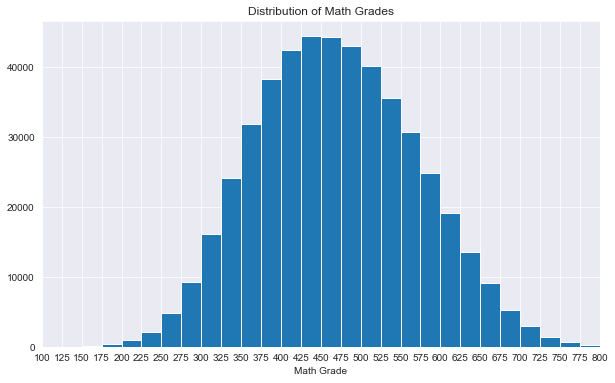

In [10]:
#start with PVMATH
binsize =25
bins = np.arange(100, df_pisa_copy['PVMATH'].max()+binsize, binsize)
plt.figure(figsize=[10, 6])
plt.hist(data = df_pisa_copy, x = 'PVMATH', bins=bins)
plt.xlabel('Math Grade')
plt.title('Distribution of Math Grades')
plt.xticks(bins)
plt.xlim([100,800])

plt.show()

Very impressive, math grade has normal distribution, most of students mark is between 400 - 600


Next up, the predictor variables of interest: ESCS (index of economic, social and cultural status), FAMCON ((Familiarity with Mathematical Concepts)), and OUTHOURS (Out-of-School Study Time)

In [11]:
df_pisa_copy['ESCS'].value_counts()

-0.42    1735
-0.20    1687
-0.82    1651
-0.14    1649
 0.05    1639
-0.69    1632
-0.48    1631
-0.27    1621
-0.49    1620
-0.54    1600
-0.56    1599
 0.07    1598
-0.76    1597
-0.29    1587
 0.17    1586
 0.65    1584
-0.18    1584
 0.12    1584
 0.14    1583
-0.78    1582
-0.63    1580
 0.22    1580
-0.06    1580
-0.30    1575
 0.91    1575
-0.33    1574
 0.60    1574
 0.23    1565
 0.80    1564
-0.67    1562
         ... 
 2.75       1
-4.88       1
-4.80       1
-4.72       1
 3.01       1
-4.66       1
-5.95       1
 2.61       1
 2.88       1
-5.02       1
 2.79       1
-4.83       1
-4.25       1
-4.26       1
-4.37       1
-4.67       1
 3.27       1
-4.40       1
-4.69       1
-4.89       1
 3.21       1
 2.78       1
-5.34       1
 2.85       1
 2.87       1
-5.01       1
-5.05       1
-5.20       1
-5.66       1
-4.49       1
Name: ESCS, Length: 784, dtype: int64

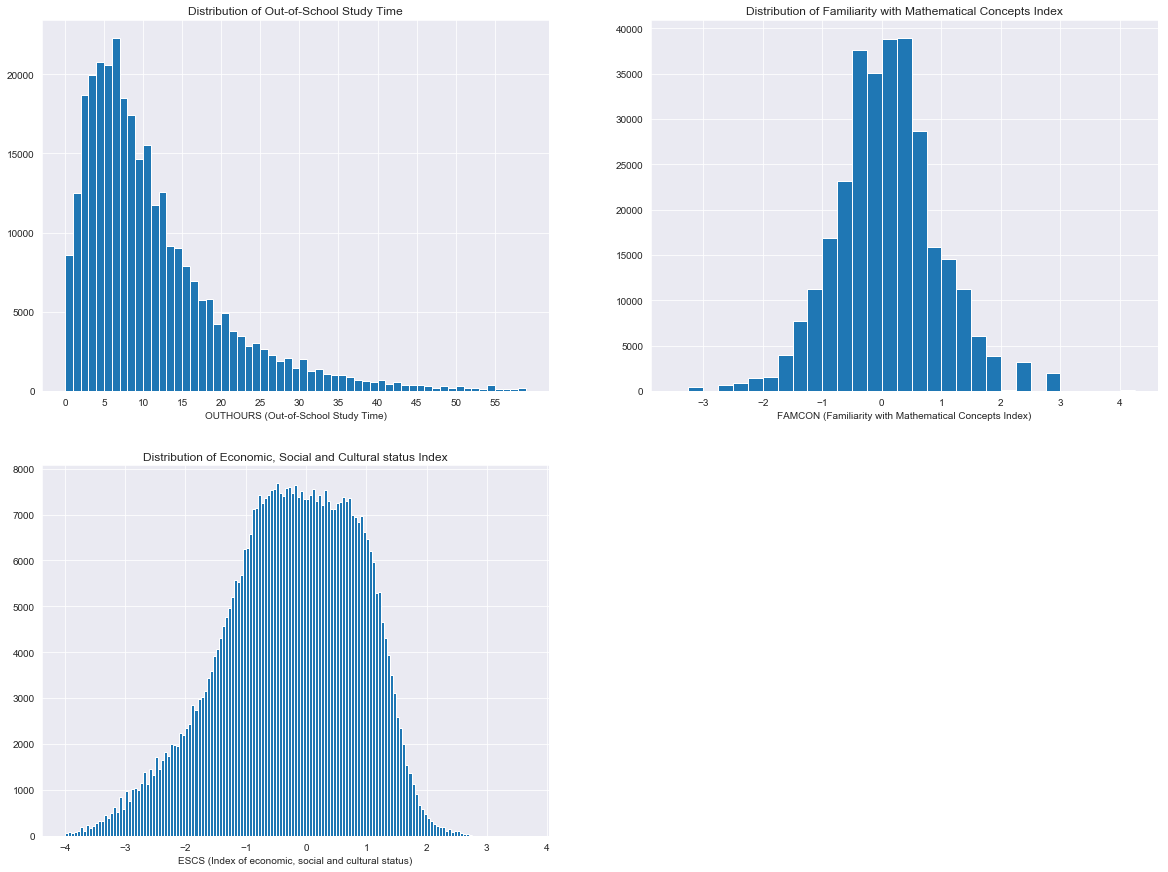

In [12]:
fig, axs = plt.subplots(2, 2,figsize=(20, 15))


bin_edges = np.arange(0, 60, 1)
axs[0,0].hist(data=df_pisa_copy, x='OUTHOURS',bins=bin_edges)
axs[0,0].set_xlabel("OUTHOURS (Out-of-School Study Time)")
axs[0,0].set_xticks(np.arange(0, 60, 5))
axs[0,0].set_title("Distribution of Out-of-School Study Time")

bin_edges = np.arange(-3.5, df_pisa_copy['FAMCON'].max(), .25)
axs[0,1].hist(data=df_pisa_copy, x='FAMCON', bins=bin_edges)
axs[0,1].set_xlabel("FAMCON (Familiarity with Mathematical Concepts Index)")
axs[0,1].set_title("Distribution of Familiarity with Mathematical Concepts Index")



bin_edges = np.arange(-4, df_pisa_copy['ESCS'].max(), .05)
axs[1,0].hist(data = df_pisa_copy, x = 'ESCS', bins=bin_edges)
axs[1,0].set_title("Distribution of Economic, Social and Cultural status Index")
axs[1,0].set_xlabel("ESCS (Index of economic, social and cultural status)")

fig.delaxes(axs[1,1])

## Bivariate Exploration

#### How these three indicators are corrleated with math grade?

(Out-of-School Study Time): 0.024213414192732013
(Familiarity with Mathematical Concepts) 0.3646472525620924
(Index of economic, social and cultural status): 0.41056996653744404


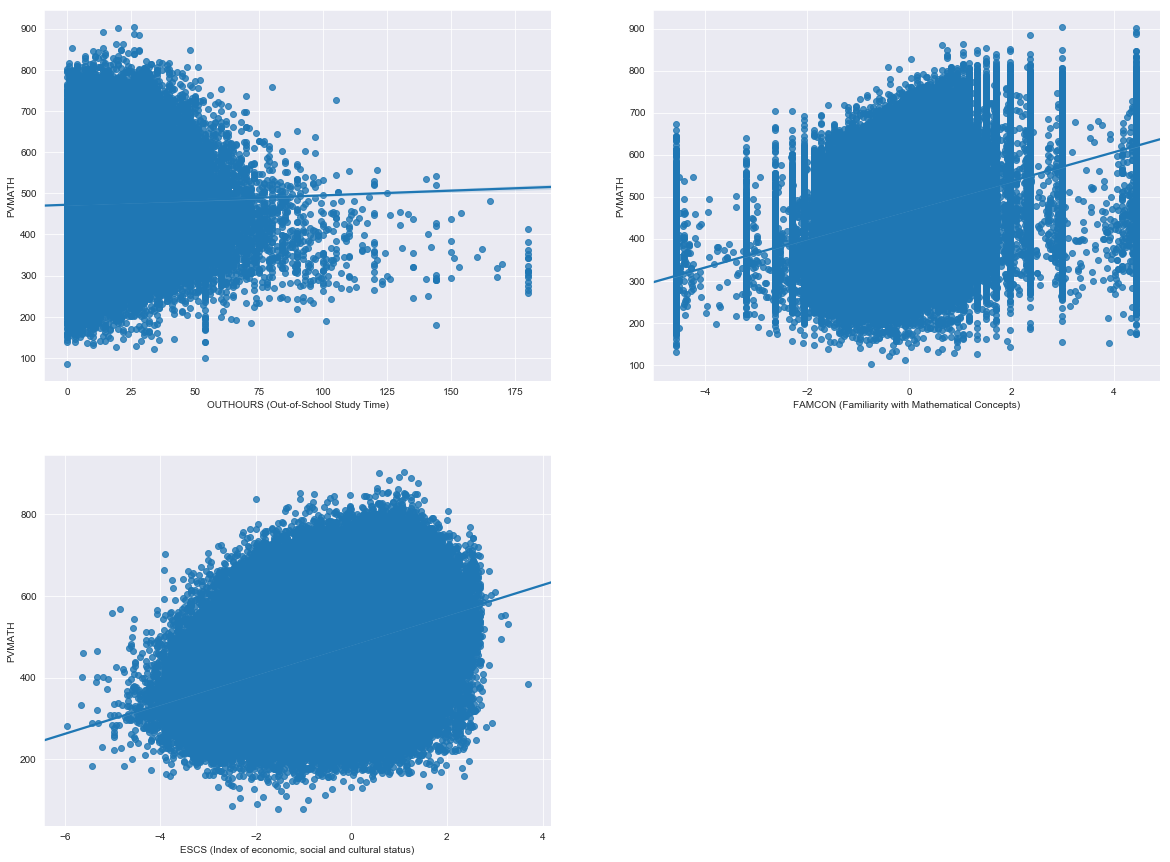

In [13]:
base_color = sb.color_palette()[0]
fig, axs = plt.subplots(2, 2,figsize=(20, 15))

sb.regplot(data=df_pisa_copy, x='OUTHOURS',y='PVMATH',ax=axs[0,0])
axs[0,0].set_xlabel("OUTHOURS (Out-of-School Study Time)")


sb.regplot(data=df_pisa_copy, x='FAMCON', y='PVMATH',ax=axs[0,1],color=base_color)
axs[0,1].set_xlabel("FAMCON (Familiarity with Mathematical Concepts)")


sb.regplot(data=df_pisa_copy, x='ESCS', y='PVMATH',ax=axs[1,0], color=base_color)
axs[1,0].set_xlabel("ESCS (Index of economic, social and cultural status)")

fig.delaxes(axs[1,1])

#Lets have a look at the correlation coefficient of each above predictor with math grade
print("(Out-of-School Study Time): " + str(df_pisa_copy['OUTHOURS'].corr(df_pisa_copy['PVMATH'])))
print("(Familiarity with Mathematical Concepts) " + str(df_pisa_copy['FAMCON'].corr(df_pisa_copy['PVMATH'])))
print("(Index of economic, social and cultural status): " + str(df_pisa_copy['ESCS'].corr(df_pisa_copy['PVMATH'])))

From the above visualization we see the following: 
* There is almost no correlation between OUTHOURS and PVMATH
* There is a moderate correlation between PVMATH and (ESCS,FAMCON)

Since I have a strong interset in investigating how familiarity with different math concepts may affect the math grade, I'd like to go deeply there and look at the most familier subject among students, and see if OUTHOURS and ESCS may affect the familierity and at the same time may affect the PVMATH. 

Again from the above we see that there is a moderate positive relationship between PVMATH and FAMCON. 

Now I'd like to see if there is any correlation between FAMCON and both ESCS and OUTHOURS. 

Dothe increase in OUTHOURS or ESCS mean an increase in familiarity with math concepts? 

In [14]:
df_pisa_copy.OUTHOURS.describe()

count    308798.000000
mean         11.104110
std          10.476685
min           0.000000
25%           4.000000
50%           8.000000
75%          14.000000
max         180.000000
Name: OUTHOURS, dtype: float64

0.18202887573025367


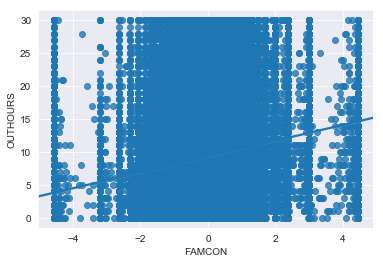

In [15]:
#Lets have a look at study hours after school vs. familierity indicator 
# I'd like to filter out all study hours above 60 hours
df_pisa_sub = df_pisa_copy[df_pisa_copy['OUTHOURS']<=30]
sb.regplot(data=df_pisa_sub,x='FAMCON',y='OUTHOURS')
print(str(df_pisa_sub['FAMCON'].corr(df_pisa_sub['OUTHOURS'])))

0.1980468938634256


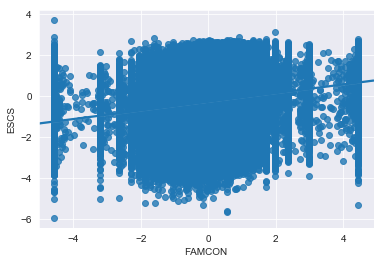

In [16]:
#Lets have a look at ESCS vs. familierity indicator 
sb.regplot(data=df_pisa_copy,x='FAMCON',y='ESCS')
print(str(df_pisa_copy['ESCS'].corr(df_pisa_copy['FAMCON'])))


From the above scattor plots, we see a very week positive relationship between study hours and familierity indicator. Also, a very week positive relation between familierity with math concepts and Index of economic, social and cultural status


Now I'd like to look at the most familier math topics among students 

In [17]:
fam_math_dic = {
    'ST62Q01' : 'Exponential Function',
    'ST62Q02' : 'Divisor',
    'ST62Q03' : 'Quadratic Function',
    'ST62Q06' : 'Linear Equation',
    'ST62Q07' : 'Vectors',
    'ST62Q08' : 'Complex Number',
    'ST62Q09' : 'Rational Number',
    'ST62Q10' : 'Radicals',
    'ST62Q12' : 'Polygon',
    'ST62Q15' : 'Congruent Figure',
    'ST62Q16' : 'Cosine',
    'ST62Q17' : 'Arithmetic Mean',
    'ST62Q19' : 'Probability'
}

familiarity_level = ['Never heard of it', 'Heard of it often',
                    'Heard of it a few times','Heard of it once or twice',
                    'Know it well,  understand the concept']

In [18]:
columns_to_stack = ['ST62Q01', 'ST62Q02', 'ST62Q03', 'ST62Q06', 'ST62Q07', 'ST62Q08', 
                   'ST62Q09', 'ST62Q10', 'ST62Q12', 'ST62Q15', 'ST62Q16', 'ST62Q17', 'ST62Q19']
columns_to_keep = ['STIDSTD','PVMATH','ST04Q01']
df_fam_math = df_pisa_copy.melt(id_vars = columns_to_keep, value_vars = columns_to_stack, 
                          var_name = 'math_subject', value_name = 'familierity_level').dropna()

In [19]:
df_fam_math.head()

,STIDSTD,PVMATH,ST04Q01,math_subject,familierity_level
1,3,505.53824,Female,ST62Q01,Never heard of it
2,4,449.45476,Female,ST62Q01,Heard of it often
4,6,365.17370,Female,ST62Q01,"Know it well, understand the concept"
5,7,490.11528,Female,ST62Q01,Heard of it a few times
8,10,433.87600,Female,ST62Q01,"Know it well, understand the concept"


In [20]:
def setFamilierityDegree(fam_str):
    if fam_str == familiarity_level[1] or fam_str == familiarity_level[2] or fam_str == familiarity_level[3]:
        return 1
    if fam_str == familiarity_level[0]:
        return 0
    if fam_str == familiarity_level[4]:
        return 2
%time df_fam_math['familierity_degree'] = df_fam_math.apply(lambda row:setFamilierityDegree(row['familierity_level']),axis=1)


Wall time: 46.3 s


In [21]:
df_familiertiy_degree = df_fam_math.groupby(['math_subject','familierity_degree'])['familierity_level'].count()
df_math_subjects = df_fam_math.groupby(['math_subject'])['STIDSTD'].count()
df_familiertiy_degree

math_subject  familierity_degree
ST62Q01       0                     117721
              1                     150066
              2                      38696
ST62Q02       0                      29802
              1                     131226
              2                     146452
ST62Q03       0                      49576
              1                     157351
              2                      99674
ST62Q06       0                      41404
              1                     141471
              2                     123857
ST62Q07       0                      87307
              1                     144109
              2                      75210
ST62Q08       0                      78211
              1                     177549
              2                      50879
ST62Q09       0                      32097
              1                     153166
              2                     122215
ST62Q10       0                      39823
              1      

In [22]:
fam_subject_dic = {}
pre_val = ''
level_counts = []
for key,value in df_familiertiy_degree.to_dict().items():
    if key[0] != pre_val:
        if pre_val != '' :
            fam_subject_dic[pre_val] = level_counts
        pre_val = key[0]
        level_counts = []
    level_counts.append(value)
    
fam_subject_dic[pre_val] = level_counts        
fam_subject_dic

{'ST62Q01': [117721, 150066, 38696],
 'ST62Q02': [29802, 131226, 146452],
 'ST62Q03': [49576, 157351, 99674],
 'ST62Q06': [41404, 141471, 123857],
 'ST62Q07': [87307, 144109, 75210],
 'ST62Q08': [78211, 177549, 50879],
 'ST62Q09': [32097, 153166, 122215],
 'ST62Q10': [39823, 137186, 129306],
 'ST62Q12': [34846, 128319, 143161],
 'ST62Q15': [75747, 135074, 95475],
 'ST62Q16': [88868, 110675, 106862],
 'ST62Q17': [78609, 130292, 97882],
 'ST62Q19': [33074, 136905, 137749]}

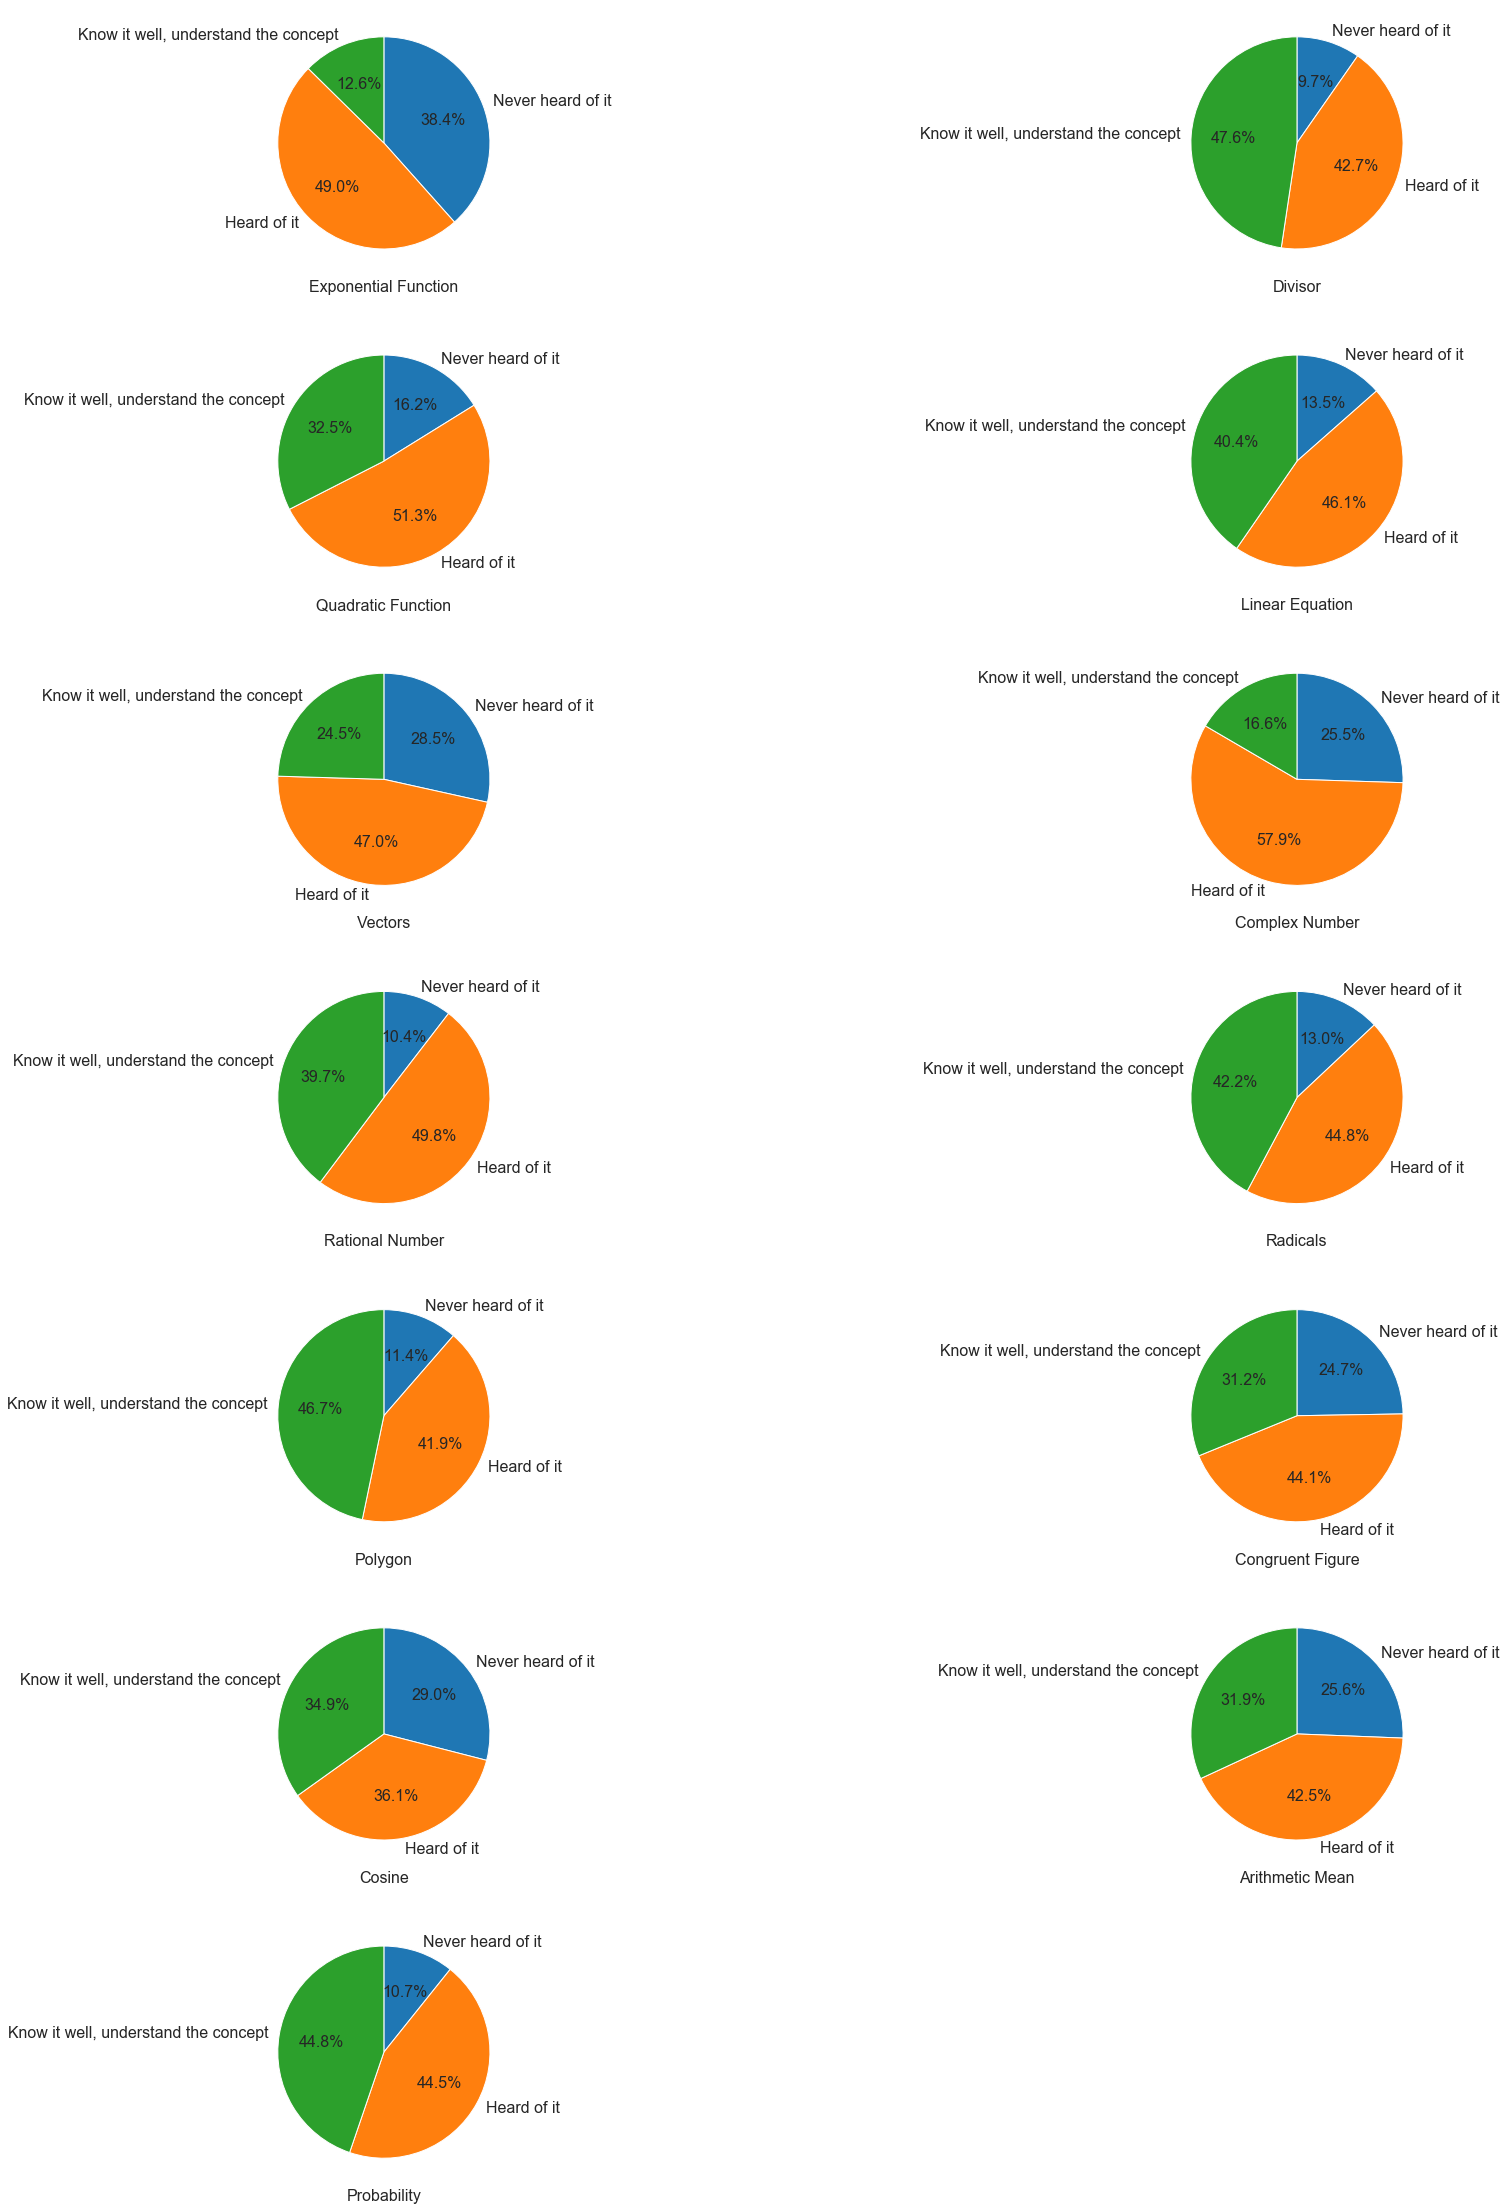

In [23]:
#use the above dictionary to visualize data using pie chart
level_labels = ['Never heard of it','Heard of it','Know it well, understand the concept']
fig, axs = plt.subplots(7, 2,figsize=(30, 40))
columns = 0
rows = 0

for key, value in fam_math_dic.items():
    if columns == 2:
        columns = 0
        rows = rows + 1
    flevel_counts = fam_subject_dic[key]
    axs[rows,columns].pie(flevel_counts,labels=level_labels,startangle = 90,
                          counterclock = False, autopct='%1.1f%%', textprops={'fontsize': 16})
    axs[rows,columns].set_xlabel(value,fontsize=16)
    columns = columns+1

fig.delaxes(axs[rows,columns])

I'd like to investigate the most well known math subject between students by using stacked bar chart

In [24]:
math_subjects = df_fam_math['math_subject'].unique()
color_palette = sb.color_palette("Paired", n_colors=13)
color_palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725)]

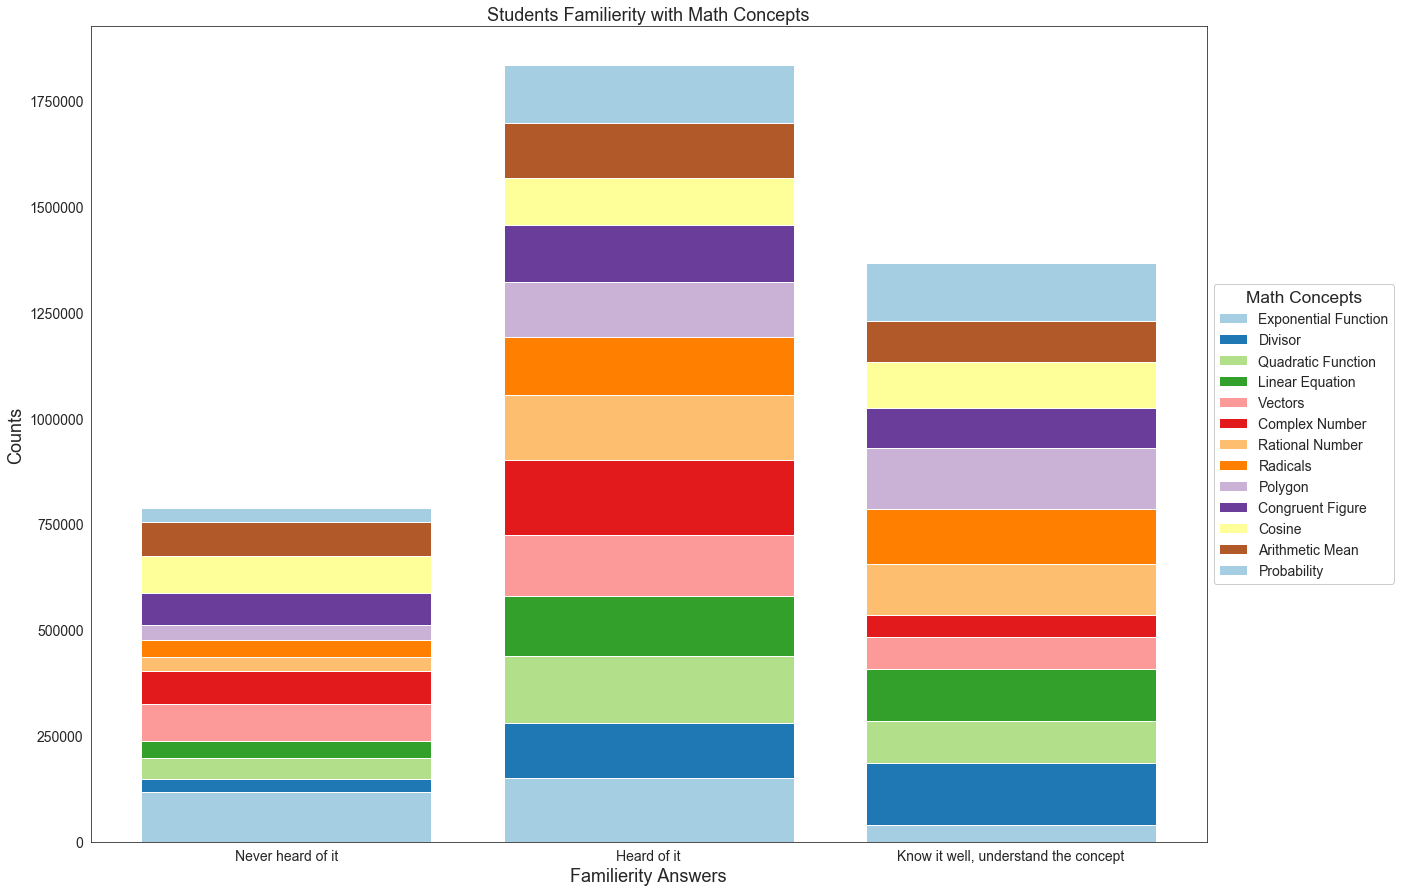

In [25]:
sb.set_style('white')
fig = plt.figure(figsize = [20,15])

cat1_order = [0,1,2]
baselines = np.zeros(len(level_labels))


# for each second-variable category:
for i in range(len(math_subjects)):
    # isolate the counts of the first category,
    math_subject = math_subjects[i]
    inner_counts = df_fam_math[df_fam_math['math_subject'] == math_subject]['familierity_degree'].value_counts()
    
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(level_labels)), height = inner_counts[cat1_order],
            bottom = baselines, color = color_palette[i] )
    
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), level_labels, fontsize=14)
plt.yticks(fontsize=14)
leg = plt.legend(fam_math_dic.values(), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6, fontsize=14);

plt.xlabel("Familierity Answers", fontsize=18)
plt.ylabel("Counts", fontsize=18)
plt.title("Students Familierity with Math Concepts",fontsize=18 )
leg.set_title("Math Concepts", prop = {'size':'xx-large'})

From the above stacked barchart, we see that the most familier math concepts are (Divisor,Linear Equation,Rational Number, Radicals, Ploygon, and Probability), while the least familierity topics are Exponential Function, complex numbers and vector. In addition to that, "Heard of it" answer has the highest frequency among students.

Now I'd like to look at the students gender per familierity level, but before exploring this, lets look at the students math grade per student gender



Text(0.5, 1.0, "Students' Math Grades per Gender")

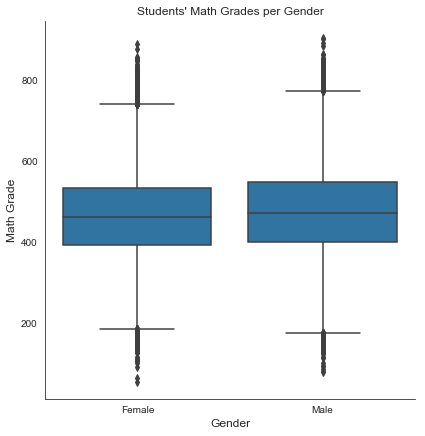

In [26]:
g = sb.FacetGrid(df_pisa_copy, height = 6)
g.map(sb.boxplot, "ST04Q01", "PVMATH");
plt.ylabel("Math Grade",fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.title("Students' Math Grades per Gender")

Very impresive, There is no quite clear difference in math grades between male and female students, however, male students show a very slightly higher grade than female

Lets investigate familierity level in math concepts per gender

Text(0.5, 1.0, 'Students Answers about Familierity with Math Concepts per Gender')

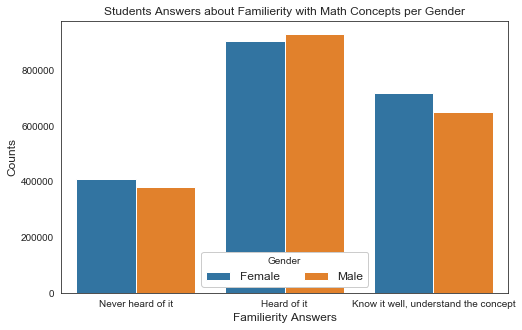

In [27]:
fig = plt.figure(figsize = [8,5])
ax = sb.countplot(data = df_fam_math, x = 'familierity_degree', hue = 'ST04Q01')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Gender', fontsize=12)
plt.xticks(np.arange(len(cat1_order)), level_labels, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Familierity Answers", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Students Answers about Familierity with Math Concepts per Gender",fontsize=12 )

Also, There is a very slight difference between students gender in familierity with math concepts. Female records a slightly higher counts in both (know it well, or never heard of it), while male has a slight higher counts in heard of it level)

Lets use text annotations to label the frequencies on bars. 


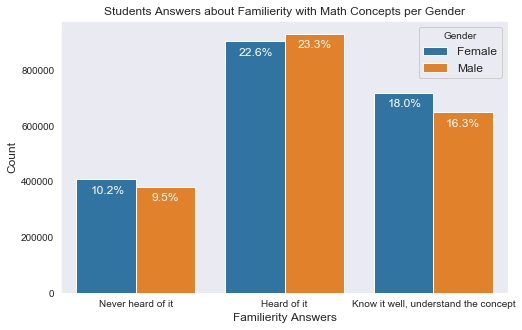

In [28]:
#Create the plot
sb.set_style('dark')
fig = plt.figure(figsize = [8,5])
ax = sb.countplot(data = df_fam_math, x = 'familierity_degree', hue = 'ST04Q01')
ax.legend( framealpha = 1, title = 'Gender', fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Familierity Answers", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Students Answers about Familierity with Math Concepts per Gender",fontsize=12 )

#add annotations
n_points = df_fam_math.shape[0]
level_count = df_fam_math.groupby('familierity_degree')['ST04Q01'].value_counts()
locs, lables = plt.xticks()

for loc, label in zip(locs, lables):
    #get the text property for the label to get the correct count
    fcount = level_count[int(label.get_text())]['Female']
    mcount = level_count[int(label.get_text())]['Male']

    pct_fstring = '{:0.1f}%'.format(100*fcount/n_points)
    pct_mstring = '{:0.1f}%'.format(100*mcount/n_points)

    # print the annotation just below the top of the bar
    ax.text(loc-.19, fcount-50000, pct_fstring, ha = 'center', color = 'w', fontsize=12)
    ax.text(loc+.2, mcount-50000, pct_mstring, ha = 'center', color = 'w',fontsize=12)

plt.xticks(np.arange(len(cat1_order)), level_labels, fontsize=10)

print('')

There is a very slight difference between students gender in familierity with math concepts. Females record a slightly higher percentage in both "Know it well" and "Never heard of it" than males, while males are very slighet higher (about .7%) than females in "Heard of it" answer.



Lets classify familierity with math concepts into two groups High (> 13) and Low (< 13)

Why 13? Since we have 13 math concepts and three level (0,1,2). If we sum all  familierity levels of all math concepts we will get a value per student range from [0,26] 

Lets now calculate total familierity level in math concept per student. 

In [29]:
for key in fam_math_dic.keys():
    %time df_pisa_copy['fd_'+key] = df_pisa_copy.apply(lambda row:setFamilierityDegree(row[key]),axis=1)

Wall time: 7.08 s
Wall time: 6.71 s
Wall time: 6.99 s
Wall time: 6.92 s
Wall time: 6.72 s
Wall time: 6.97 s
Wall time: 7.05 s
Wall time: 7.37 s
Wall time: 7.67 s
Wall time: 7.37 s
Wall time: 7.22 s
Wall time: 7.32 s
Wall time: 7.21 s


In [30]:
%time df_pisa_copy['fm_degree_total'] = df_pisa_copy.apply(lambda row:sum([row['fd_ST62Q01'],row['fd_ST62Q02'],row['fd_ST62Q03'], row['fd_ST62Q06'],row['fd_ST62Q07'],row['fd_ST62Q08'],row['fd_ST62Q09'],row['fd_ST62Q10'],row['fd_ST62Q12'],row['fd_ST62Q15'],row['fd_ST62Q16'],row['fd_ST62Q17'],row['fd_ST62Q19']]),axis=1)

Wall time: 42.6 s


In [31]:
df_pisa_copy['fm_degree_total'].describe()

count    283642.000000
mean         14.992420
std           5.510852
min           0.000000
25%          11.000000
50%          15.000000
75%          19.000000
max          26.000000
Name: fm_degree_total, dtype: float64

0.41985004136470805


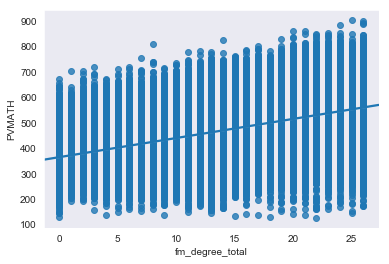

In [32]:
sb.regplot(data=df_pisa_copy,x='fm_degree_total',y='PVMATH')
print(str(df_pisa_copy['fm_degree_total'].corr(df_pisa_copy['PVMATH'])))

We see that the correlation coefficient of fm_degree_total vs. PVMATH is very close to the correlation coefficient of FAMCON vs. PVMATH

Lets classify total familierity with math concepts into groups High, Low. It is high when total familierity is greater than or equal to 13, and it is Low when total familierity is lower than 13

In [33]:
df_pisa_copy['fm_degree_ca']= None
df_pisa_copy['fm_degree_ca'] = df_pisa_copy['fm_degree_total'] >= 13


In [34]:
%time df_pisa_copy['fm_degree_ca'].replace({True:'High',False:'Low'}, inplace=True)


Wall time: 17 ms


We like to look at total familierity per gender, then we want to see if students with high familierity in math concepts will have higher math grade, and see if students with high ESCS and high familierity in math concepts will have high math grade. 

Finally, as I'm from middle east, I'd like to look at the students math grades in these countries  (Tunisia, Jordan, Qatar, Israel, Turkey, United Arab Emirates) groupbed by ESCS

In [35]:
#Lets cut ESCS into interval groups 
escs_heights, escs_bins = np.histogram(df_pisa_copy.ESCS[~df_pisa_copy['ESCS'].isnull()], bins = 7)
df_pisa_copy["ESCS_bk"] = None
df_pisa_copy["ESCS_bk"] = pd.cut(df_pisa_copy.ESCS, bins= escs_bins)

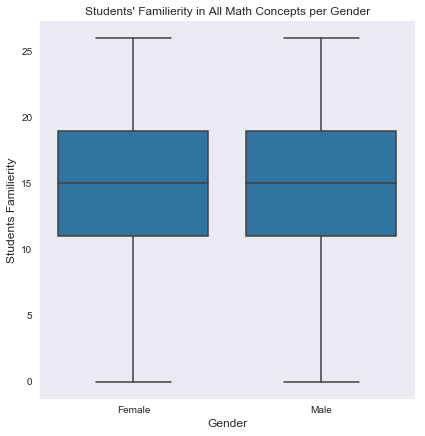

In [36]:
g = sb.FacetGrid(df_pisa_copy, height = 6)
g.map(sb.boxplot, "ST04Q01", "fm_degree_total");
plt.ylabel("Students Familierity", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.title("Students' Familierity in All Math Concepts per Gender", fontsize='12')
print("")

impressive!, Both male and female studetns have the same distribution in the familierity with all math concepts

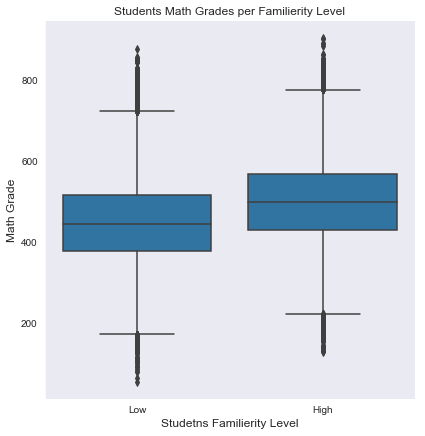

In [37]:
g = sb.FacetGrid(df_pisa_copy, height = 6)
g.map(sb.boxplot, "fm_degree_ca", "PVMATH");
plt.yticks(fontsize=10)
plt.xlabel("Studetns Familierity Level", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Familierity Level",fontsize=12 )
plt.xticks(fontsize=10)
print("")

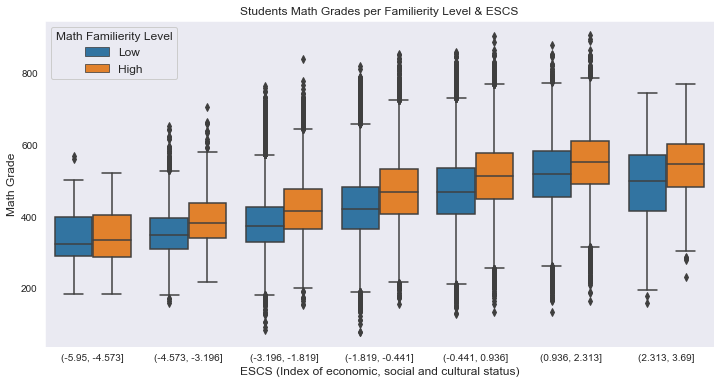

In [38]:
fig = plt.figure(figsize = [12,6])
ax = sb.boxplot(data=df_pisa_copy,x="ESCS_bk",y='PVMATH',hue="fm_degree_ca")
leg = ax.legend(framealpha = 1, fontsize=12, loc = 0);
leg.set_title("Math Familierity Level", prop = {'size':'large'})
plt.xlabel("ESCS (Index of economic, social and cultural status)", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Familierity Level & ESCS",fontsize=12)

#bbox_to_anchor = (1, 0.5), loc = 6, fontsize=14
print("")

From the above chart we see that students with high ESCS will have higher math grades than studetnst with low ESCS. Also, for each ESCS group we see students with high familierity in all math concepts have higher math grades than students with low familierity

 Lets look at the students math grades in these countries (Tunisia, Jordan, Qatar, Israel, Turkey, United Arab Emirates) groupbed by ESCS

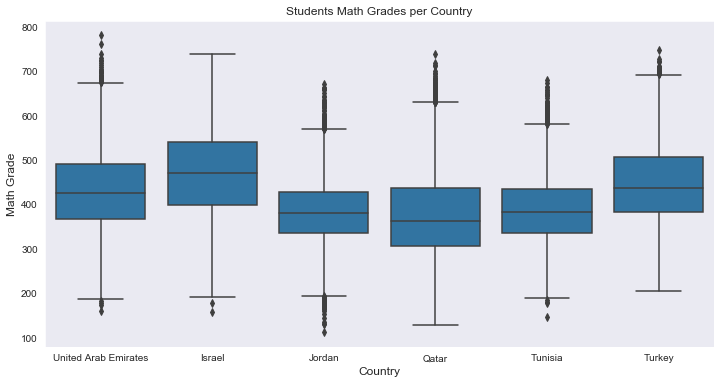

In [39]:
countries = ['Tunisia', 'Jordan', 'Qatar', 'Israel', 'Turkey', 'United Arab Emirates']
df_cnt_sub = df_pisa_copy[df_pisa_copy.CNT.isin(countries)]
#how is the students performance in these countries 
fig = plt.figure(figsize = [12,6])
sb.boxplot(data=df_cnt_sub,x="CNT",y='PVMATH',color=base_color)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Country",fontsize=12)

plt.show()

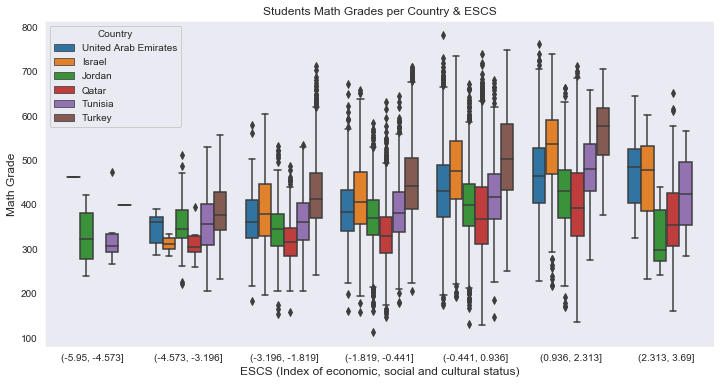

In [40]:
#how ESC of these countries have an affect over math grade
fig = plt.figure(figsize = [12,6])
ax = sb.boxplot(data=df_cnt_sub,x="ESCS_bk",y='PVMATH',hue="CNT")
leg = ax.legend(framealpha = 1, loc = 0);
leg.set_title("Country")
plt.xlabel("ESCS (Index of economic, social and cultural status)", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Country & ESCS",fontsize=12)

plt.show()

From the above chart, we see the following: 
- The lowest ESCS group (-5.95, -4.753] includes only two countries (Tunisia and Jordan)
- No participants from Turkey country fall in ESCS group (2.313, 3.69] 
- For each ESCS group (-4.573, 2.313], Turkish students have the highest math grade average comparing to students from other countries 
- The most impresive insight is that students who fall in the highest ESCS group don't have higher math grades comparing to those who fall in (0.936,2.313) ESCS group except students from UAE have higher average math grade in (2.3, 3.6] that those in (0.9, 2.3]

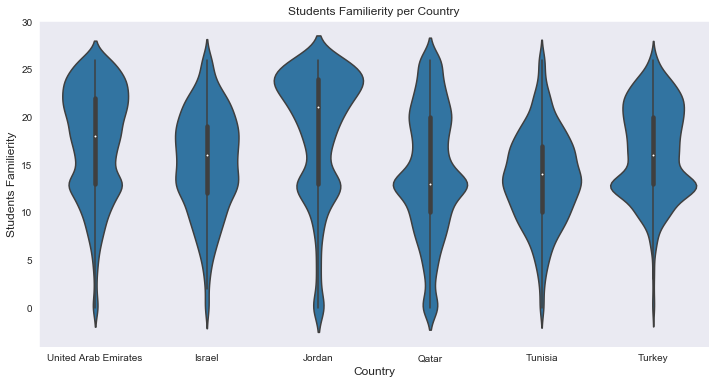

In [41]:
fig = plt.figure(figsize = [12,6])
sb.violinplot(data=df_cnt_sub,x="CNT",y='fm_degree_total',color=base_color)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Students Familierity", fontsize=12)
plt.title("Students Familierity per Country",fontsize=12)
plt.show()

In [42]:
df_pisa_copy.to_csv("pisa2012_modified.csv", index=False)

In [43]:
df_fam_math.to_csv("familierity_with_math.csv", index=False)